# Importing Libraries, Models and Functions


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Loading Dataset

In [36]:
hr_analytics = pd.read_csv('HR_comma_sep.csv')
hr_analytics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Cleaning and Preprocessing the Dataset

Using LabelEncoder to Ordinally encode the salary labels (low, medium, high)

Using LabelBinariser to Categorically encode the various Department vales

In [37]:
db = LabelBinarizer()
se = LabelEncoder()

values_department = db.fit_transform(hr_analytics['Department'])
columns_department = db.classes_

dp_df = pd.DataFrame(values_department, columns=columns_department)

values_salary = se.fit_transform(hr_analytics['salary'])

hr_analytics.drop(['Department', 'salary'], axis=1,inplace=True)

new_analytics = pd.concat([hr_analytics,dp_df], axis=1)
new_analytics['salary'] = values_salary

new_analytics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,2
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1


# Feature Manipulation

 - The average amount of hours working is a good feature.
 - But depending on the department of the employee average varies.
 - This cannot be generalised.
 - Therefore a new column is made for each deparment whose value is the difference between the mean working hours values and the employee avg working hours

In [38]:
for i in columns_department:
    department_working_hours = new_analytics[new_analytics[i]==1]['average_montly_hours']
    avg_dept_working_hours = department_working_hours.mean()
    new_analytics[f"{i}_avg_working_hours_deviation"] = department_working_hours-avg_dept_working_hours
    print(f'{i}: {avg_dept_working_hours}')

new_analytics.drop('average_montly_hours', axis=1,inplace=True)

new_analytics.fillna(0, inplace=True)

new_analytics


IT: 202.2159739201304
RandD: 200.8005082592122
accounting: 201.16297262059973
hr: 198.68470906630583
management: 201.24920634920636
marketing: 199.3857808857809
product_mng: 199.96563192904657
sales: 200.91135265700484
support: 200.75818752803949
technical: 202.49742647058824


,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,...,IT_avg_working_hours_deviation,RandD_avg_working_hours_deviation,accounting_avg_working_hours_deviation,hr_avg_working_hours_deviation,management_avg_working_hours_deviation,marketing_avg_working_hours_deviation,product_mng_avg_working_hours_deviation,sales_avg_working_hours_deviation,support_avg_working_hours_deviation,technical_avg_working_hours_deviation
0,0.38,0.53,2,3,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.911353,0.000000,0.0
1,0.80,0.86,5,6,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.088647,0.000000,0.0
2,0.11,0.88,7,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.088647,0.000000,0.0
3,0.72,0.87,5,5,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.088647,0.000000,0.0
4,0.37,0.52,2,3,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-41.911353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-49.758188,0.0
14995,0.37,0.48,2,3,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-40.758188,0.0
14996,0.37,0.53,2,3,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-57.758188,0.0
14997,0.11,0.96,6,4,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,79.241812,0.0


In [39]:
# new_analytics['projects per year'] = new_analytics['number_project']/new_analytics['time_spend_company']

# new_analytics['happiness_improvement'] = new_analytics['last_evaluation']-new_analytics['satisfaction_level']

# new_analytics.drop([
#     'number_project','time_spend_company', 
#     'last_evaluation', 'satisfaction_level'
# ], axis=1, inplace=True)


corr_matrix = new_analytics.corr()
corr_matrix['left'].sort_values(ascending=True)


satisfaction_level                        -0.388375
Work_accident                             -0.154622
promotion_last_5years                     -0.061788
RandD                                     -0.046596
management                                -0.046035
product_mng                               -0.011029
IT                                        -0.010925
hr_avg_working_hours_deviation            -0.004150
salary                                    -0.001294
marketing                                 -0.000859
marketing_avg_working_hours_deviation      0.004321
last_evaluation                            0.006567
management_avg_working_hours_deviation     0.008830
sales                                      0.009923
support                                    0.010700
accounting                                 0.015201
accounting_avg_working_hours_deviation     0.016220
RandD_avg_working_hours_deviation          0.017093
product_mng_avg_working_hours_deviation    0.019740
technical   

# Deriving the features (X) and labels (Y) for prediction
# Plotting features vs labels

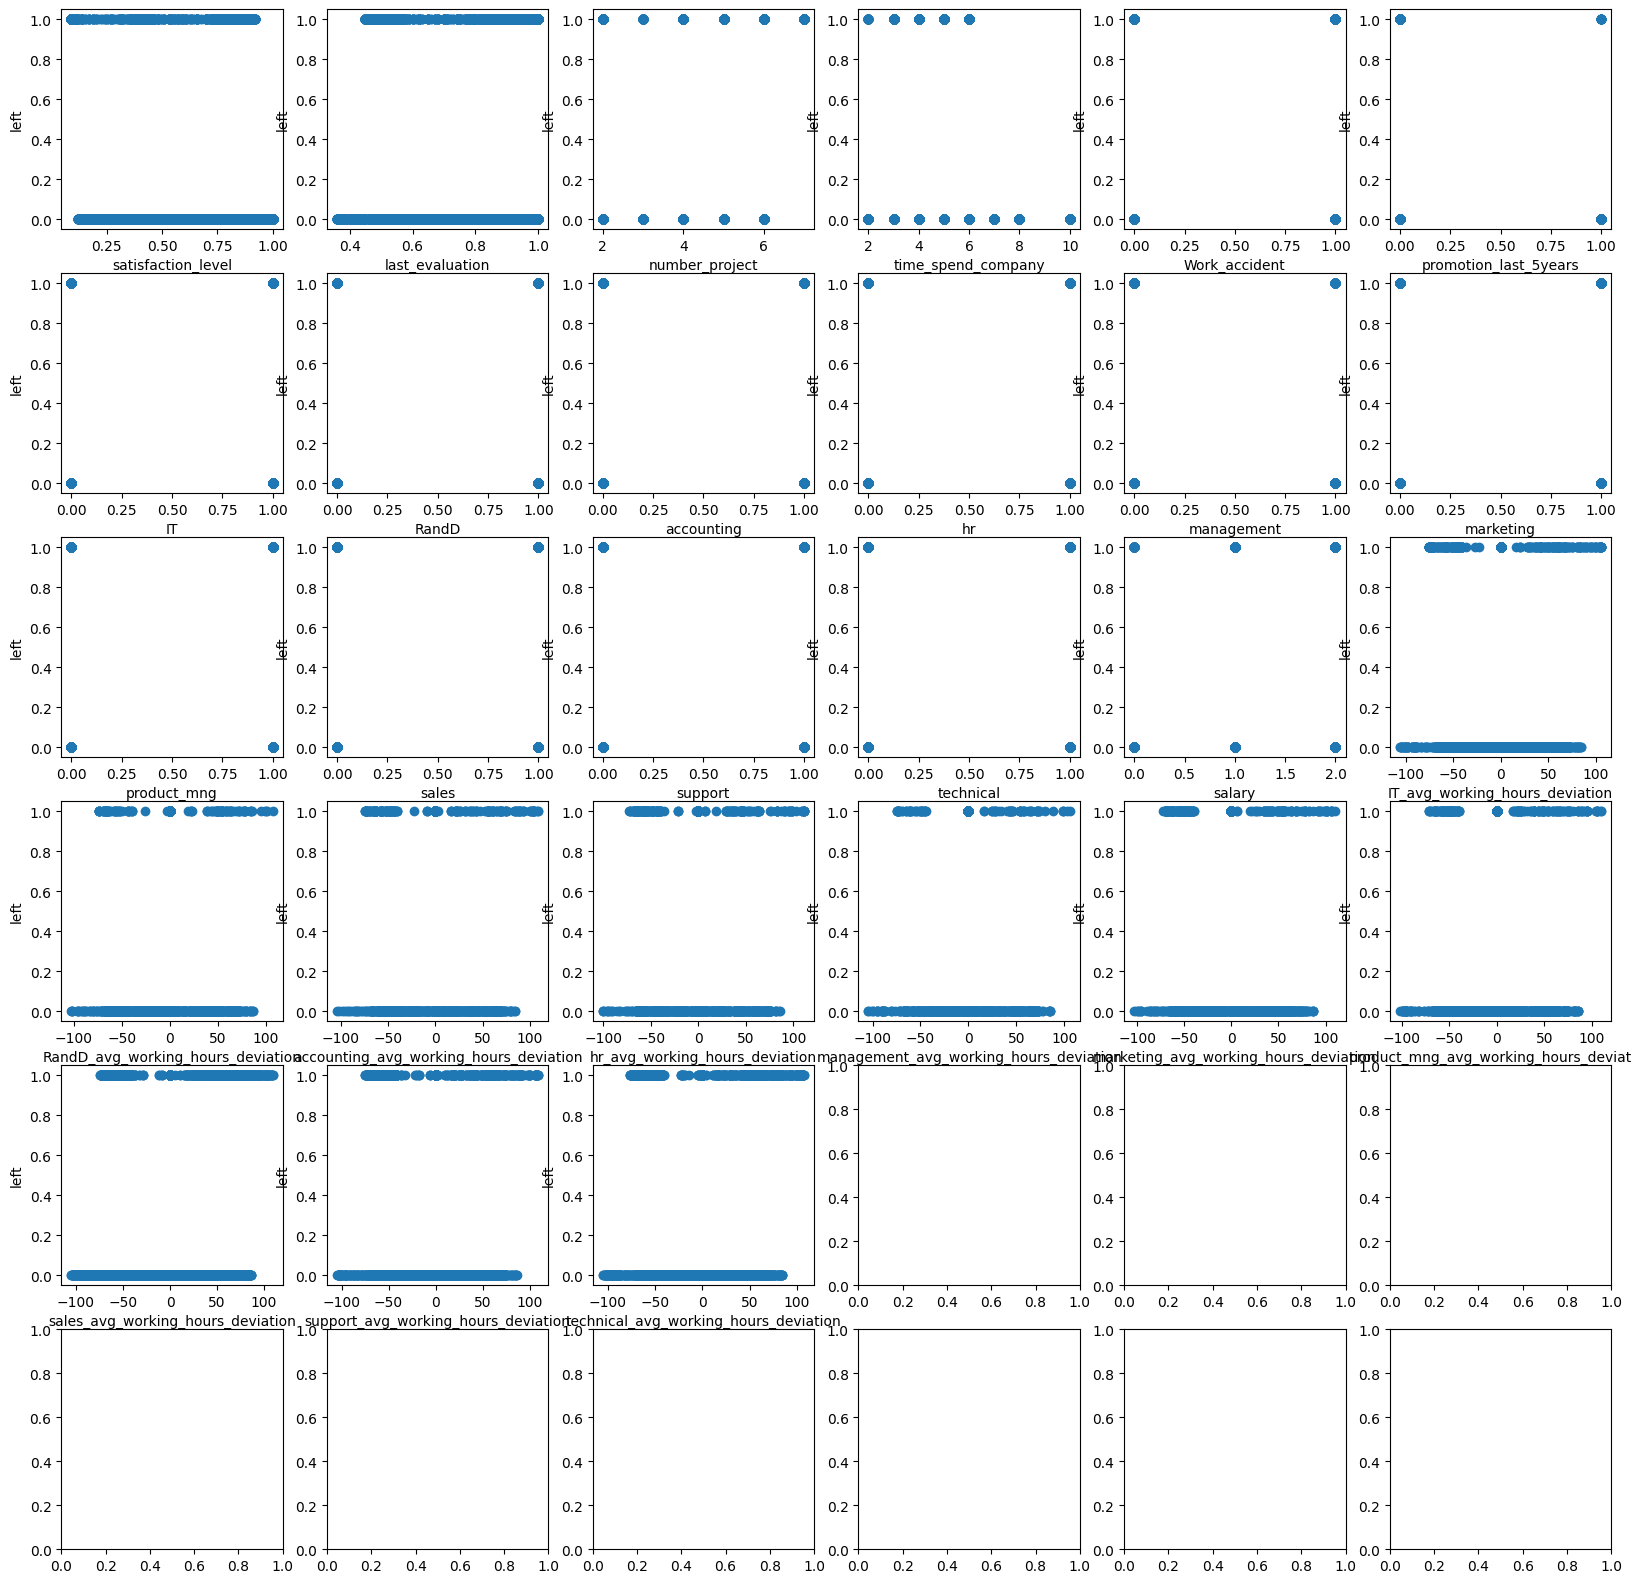

In [40]:
from math import ceil


features = new_analytics.drop('left', axis=1)
labels = new_analytics['left']

no_of_plots = ceil(len(features.columns)**(1/2))

fig , ax = plt.subplots(nrows=no_of_plots, ncols=no_of_plots, figsize=(20,20))
ax = ax.flatten()

for i in features.columns:
    posi = features.columns.get_loc(i)
    ax[posi].scatter(features[i], labels, marker='o')
    ax[posi].set_xlabel(i)
    ax[posi].set_ylabel('left')


# Splitting train and test dataset

In [41]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, test_size=0.2)

# Feature Scaling on training and testing values

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

In [43]:

models = {'Logistic Regression': LogisticRegression(), 'Random Forest Classifier': RandomForestClassifier(), 
          "Support Vector Classifier": SVC(), 'Gradient Boosting Classifier': GradientBoostingClassifier(), 
          'Ada Boost Classifier': AdaBoostClassifier(), 'Decision Tree Classifier': DecisionTreeClassifier(),
          'KNeighbors Classifier':KNeighborsClassifier(),
         
         }

accuracy, precision = {}, {}


rf = RandomForestClassifier()

for i in models.keys():
    models[i].fit(X_train,y_train)
    pred_value = models[i].predict(X_test)
    accuracy[i] = accuracy_score(y_test, pred_value)
    precision[i] = precision_score(y_test, pred_value)

accuracy_models =pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision'])
accuracy_models['Accuracy'] = accuracy.values()
accuracy_models['Precision'] = precision.values()

accuracy_models

,Accuracy,Precision
Logistic Regression,0.770667,0.526984
Random Forest Classifier,0.989333,0.988389
Support Vector Classifier,0.952667,0.895921
Gradient Boosting Classifier,0.974000,0.956332
Ada Boost Classifier,0.953667,0.905444
Decision Tree Classifier,0.976333,0.942737
KNeighbors Classifier,0.943000,0.864754
